In [24]:
import pandas as pd

# python basic classes
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# scikit-learn commonly used classes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# scikit-learn popular classifiers
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

In [36]:
X_24_12 = pd.read_csv('X_24_12.csv')
X_48_12 = pd.read_csv('X_48_12.csv')
ts_aws12 = pd.read_csv('ts_aws12.csv')

In [37]:
y_24 = pd.read_csv('y_24.csv')['after24_loc_predict']
y_48 = pd.read_csv('y_48.csv')['after48_loc_predict']

In [38]:
X_24_2 = X_24_12.drop('date', axis=1)
X_48_2 = X_48_12.drop('date', axis=1)
ts_aws_1 = ts_aws12.drop('date', axis=1)

In [39]:
X_24_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346005 entries, 0 to 346004
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   plant                         346005 non-null  int64  
 1   loc                           346005 non-null  int64  
 2   tem_in                        346005 non-null  float64
 3   hum_in                        346005 non-null  float64
 4   tem_coil                      346005 non-null  float64
 5   tem_out_loc1                  346005 non-null  float64
 6   hum_out_loc1                  346005 non-null  float64
 7   temp                          344826 non-null  float64
 8   1m_rain                       343686 non-null  float64
 9   rain_ornot                    344850 non-null  float64
 10  wind_direct_x                 344892 non-null  float64
 11  wind_speed_x                  344892 non-null  float64
 12  humid                         344922 non-nul

In [14]:
X_48_2.shape

(344694, 57)

In [15]:
y_48.shape

(344694,)

In [35]:
X_24_2.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
0,1,1,16.0,24.0,11.0,9.0,42.0,6.8,0.0,0.0,...,10.372866,7.2,0.0,0.0,216.9,1.1,1013.0,1015.7,0.0,0.0
1,1,1,14.0,28.0,10.0,7.0,59.0,5.2,0.0,0.0,...,0.000000,4.7,0.0,0.0,154.0,1.2,1012.2,1014.9,0.0,0.0
2,1,1,13.0,33.0,10.0,6.0,56.0,6.8,0.0,0.0,...,0.000000,3.5,0.0,0.0,200.6,1.1,1012.4,1015.1,0.0,0.0
3,1,1,13.0,33.0,10.0,18.0,30.0,13.9,0.0,0.0,...,8.847935,12.2,0.0,0.0,161.4,0.6,1014.0,1016.7,0.0,0.0
4,1,1,16.0,28.0,10.0,18.0,20.0,20.4,0.0,0.0,...,9.784704,20.1,0.0,0.0,15.4,1.4,1013.0,1015.6,0.0,0.0


### data split

In [16]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_24_2, y_24, test_size=0.25, random_state=0)

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_48_2, y_48, test_size=0.25, random_state=0)

In [19]:
X_test1

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
317299,2,3,28.13,37.18,27.31,23.19,53.94,21.1,0.0,0.0,...,10.651123,22.1,0.0,0.0,300.0,3.0,1013.8,1016.4,0.0,0.0
56282,1,1,11.77,37.85,9.98,10.12,39.47,7.4,0.0,0.0,...,9.700147,8.9,0.0,0.0,279.0,5.5,1016.4,1018.8,0.0,0.0
25976,1,1,34.33,51.19,30.82,32.89,52.66,34.3,0.0,0.0,...,10.404263,37.6,0.0,0.0,312.4,1.2,999.6,1002.0,0.0,0.0
274174,2,2,5.94,34.31,7.89,-0.59,49.39,-4.6,0.0,0.0,...,0.000000,-3.4,0.0,0.0,312.8,0.8,1026.2,1028.8,0.0,0.0
258144,2,2,31.70,41.15,28.11,30.48,42.98,29.7,0.0,0.0,...,10.348173,31.7,0.0,0.0,116.1,4.5,1007.4,1009.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24124,1,1,33.05,67.83,32.34,29.60,76.95,28.6,0.0,0.0,...,10.085809,28.5,0.0,0.0,259.9,2.0,1000.8,1003.3,0.0,0.0
9648,1,1,6.49,47.10,6.02,2.52,57.69,0.9,0.0,0.0,...,0.000000,1.6,0.0,0.0,293.3,5.6,1015.8,1018.6,0.0,0.0
167196,1,3,4.87,76.83,4.91,1.30,92.46,0.7,0.0,0.0,...,0.000000,0.2,0.0,0.0,220.9,1.1,1019.4,1021.9,0.0,0.0
217801,2,1,2.28,43.38,0.18,0.08,54.15,-1.6,0.0,0.0,...,7.272398,-3.0,0.0,0.0,121.0,0.8,1030.4,1033.0,0.0,0.0


In [20]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259503 entries, 224521 to 305711
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   plant                         259503 non-null  int64  
 1   loc                           259503 non-null  int64  
 2   tem_in                        259503 non-null  float64
 3   hum_in                        259503 non-null  float64
 4   tem_coil                      259503 non-null  float64
 5   tem_out_loc1                  259503 non-null  float64
 6   hum_out_loc1                  259503 non-null  float64
 7   temp                          259503 non-null  float64
 8   1m_rain                       259503 non-null  float64
 9   rain_ornot                    259503 non-null  float64
 10  wind_direct_x                 259503 non-null  float64
 11  wind_speed_x                  259503 non-null  float64
 12  humid                         259503 no

- 24시간 뒤 예측

In [21]:
X_train1.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
224521,2,1,4.54,66.00,3.57,5.57,72.59,1.6,0.0,0.0,...,6.802395,3.2,0.0,0.0,283.6,1.9,1023.7,1026.2,0.0,0.0
207354,2,1,18.70,30.25,16.51,19.65,22.95,19.1,0.0,0.0,...,10.141717,19.6,0.0,0.0,18.4,1.1,1020.2,1022.5,0.0,0.0
11801,1,1,8.17,64.87,6.97,9.11,52.53,6.8,0.0,0.0,...,8.119696,6.4,0.0,0.0,146.7,1.2,1018.8,1021.5,0.0,0.0
342605,2,3,9.05,54.18,10.33,5.42,78.02,3.0,0.0,0.0,...,0.000000,3.4,0.0,0.0,292.1,3.4,1015.0,1017.4,0.0,0.0
148189,1,3,16.90,46.40,15.86,12.44,56.99,9.7,0.0,0.0,...,10.524064,11.9,0.0,0.0,283.8,1.5,1021.7,1024.4,0.0,0.0


In [25]:
xgb2 = XGBClassifier()

In [26]:
xgb2.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [27]:
X_test1

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
317299,2,3,28.13,37.18,27.31,23.19,53.94,21.1,0.0,0.0,...,10.651123,22.1,0.0,0.0,300.0,3.0,1013.8,1016.4,0.0,0.0
56282,1,1,11.77,37.85,9.98,10.12,39.47,7.4,0.0,0.0,...,9.700147,8.9,0.0,0.0,279.0,5.5,1016.4,1018.8,0.0,0.0
25976,1,1,34.33,51.19,30.82,32.89,52.66,34.3,0.0,0.0,...,10.404263,37.6,0.0,0.0,312.4,1.2,999.6,1002.0,0.0,0.0
274174,2,2,5.94,34.31,7.89,-0.59,49.39,-4.6,0.0,0.0,...,0.000000,-3.4,0.0,0.0,312.8,0.8,1026.2,1028.8,0.0,0.0
258144,2,2,31.70,41.15,28.11,30.48,42.98,29.7,0.0,0.0,...,10.348173,31.7,0.0,0.0,116.1,4.5,1007.4,1009.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24124,1,1,33.05,67.83,32.34,29.60,76.95,28.6,0.0,0.0,...,10.085809,28.5,0.0,0.0,259.9,2.0,1000.8,1003.3,0.0,0.0
9648,1,1,6.49,47.10,6.02,2.52,57.69,0.9,0.0,0.0,...,0.000000,1.6,0.0,0.0,293.3,5.6,1015.8,1018.6,0.0,0.0
167196,1,3,4.87,76.83,4.91,1.30,92.46,0.7,0.0,0.0,...,0.000000,0.2,0.0,0.0,220.9,1.1,1019.4,1021.9,0.0,0.0
217801,2,1,2.28,43.38,0.18,0.08,54.15,-1.6,0.0,0.0,...,7.272398,-3.0,0.0,0.0,121.0,0.8,1030.4,1033.0,0.0,0.0


In [28]:
pred2 = xgb2.predict(X_test1)

In [29]:
pred2

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_test1, pred2)

0.8948983368864929

In [32]:
from sklearn.metrics import confusion_matrix, precision_score

In [33]:
conf = confusion_matrix(y_test1, pred2)

In [34]:
conf

array([[85971,    26],
       [  106,   399]], dtype=int64)

In [339]:
(conf[1,1] / (conf[1,1] + conf[1,0] + conf[0,1]))*100

75.14124293785311

In [340]:
precision_score(y_test1, pred2)

0.9388235294117647

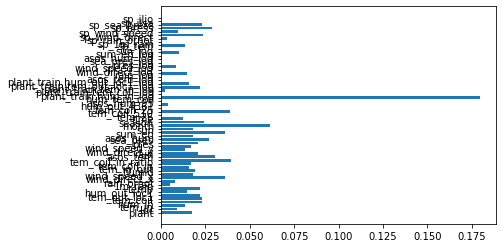

In [341]:
plt.barh(X_train1.columns, xgb2.feature_importances_)
plt.show()

In [342]:
xgb2.feature_importances_

array([0.01735706, 0.00909597, 0.01348845, 0.02304583, 0.02283956,
       0.02181035, 0.01467179, 0.02184494, 0.0053323 , 0.00782901,
       0.03599368, 0.01790565, 0.0192134 , 0.01568256, 0.01700111,
       0.03940472, 0.03017896, 0.02060248, 0.01357321, 0.01705845,
       0.02093948, 0.02680965, 0.01782057, 0.03578627, 0.01824944,
       0.06111844, 0.02427181, 0.01232288, 0.        , 0.03913328,
       0.        , 0.0039018 , 0.        , 0.17951684, 0.        ,
       0.00253759, 0.02185188, 0.01598371, 0.        , 0.        ,
       0.01487972, 0.        , 0.00846138, 0.        , 0.        ,
       0.        , 0.01017208, 0.        , 0.01376158, 0.        ,
       0.00346864, 0.02385951, 0.00972972, 0.02860378, 0.02289045,
       0.        , 0.        ], dtype=float32)

In [343]:
X_train1.columns

Index(['plant', 'loc', 'tem_in', 'hum_in', 'tem_coil', 'tem_out_loc1',
       'hum_out_loc1', 'temp', '1m_rain', 'rain_ornot', 'wind_direct_x',
       'wind_speed_x', 'humid', 'tem_in_out', 'tem_coil_in',
       'tem_coil_in_ratio', 'asos_tem', 'rain', 'wind_direct_y',
       'wind_speed_y', 'pres', 'sea_pres', 'asos_hum', 'sum_en', 'sun',
       'month', 'season', 'time', 'tem_26', 'tem_coil_510', 'tem_coil_25',
       'hum_out_4361', 'asos_hum_95', 'hum_tem_coil', 'plant_train.hum_in_log',
       'plant_train.tem_coil_log', 'plant_train.tem_in_log',
       'plant_train.tem_out_loc1_log', 'plant_train.hum_out_loc1_log',
       'asos_tem_log', 'rain_log', 'wind_direct_log', 'wind_speed_log',
       'pres_log', 'sea_pres_log', 'asos_hum_log', 'sum_en_log', 'sun_log',
       'sp_tem', 'sp_1m_rain', 'sp_rain_ornot', 'sp_wind_direct',
       'sp_wind_speed', 'sp_press', 'sp_sea_press', 'sp_ilsa', 'sp_iljo'],
      dtype='object')

In [344]:
X_train1.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
224521,2,1,4.54,66.00,3.57,5.57,72.59,1.6,0.0,0.0,...,6.802395,3.2,0.0,0.0,283.6,1.9,1023.7,1026.2,0.0,0.0
207354,2,1,18.70,30.25,16.51,19.65,22.95,19.1,0.0,0.0,...,10.141717,19.6,0.0,0.0,18.4,1.1,1020.2,1022.5,0.0,0.0
11801,1,1,8.17,64.87,6.97,9.11,52.53,6.8,0.0,0.0,...,8.119696,6.4,0.0,0.0,146.7,1.2,1018.8,1021.5,0.0,0.0
342605,2,3,9.05,54.18,10.33,5.42,78.02,3.0,0.0,0.0,...,0.000000,3.4,0.0,0.0,292.1,3.4,1015.0,1017.4,0.0,0.0
148189,1,3,16.90,46.40,15.86,12.44,56.99,9.7,0.0,0.0,...,10.524064,11.9,0.0,0.0,283.8,1.5,1021.7,1024.4,0.0,0.0


- 48시간 뒤 예측

In [345]:
xgb3 = XGBClassifier()

In [346]:
xgb3.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [380]:
X_train1.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
224521,2,1,4.54,66.00,3.57,5.57,72.59,1.6,0.0,0.0,...,6.802395,3.2,0.0,0.0,283.6,1.9,1023.7,1026.2,0.0,0.0
207354,2,1,18.70,30.25,16.51,19.65,22.95,19.1,0.0,0.0,...,10.141717,19.6,0.0,0.0,18.4,1.1,1020.2,1022.5,0.0,0.0
11801,1,1,8.17,64.87,6.97,9.11,52.53,6.8,0.0,0.0,...,8.119696,6.4,0.0,0.0,146.7,1.2,1018.8,1021.5,0.0,0.0
342605,2,3,9.05,54.18,10.33,5.42,78.02,3.0,0.0,0.0,...,0.000000,3.4,0.0,0.0,292.1,3.4,1015.0,1017.4,0.0,0.0
148189,1,3,16.90,46.40,15.86,12.44,56.99,9.7,0.0,0.0,...,10.524064,11.9,0.0,0.0,283.8,1.5,1021.7,1024.4,0.0,0.0


In [347]:
pred2_48 = xgb3.predict(X_test2)

In [348]:
pred2_48

array([0., 0., 0., ..., 0., 0., 0.])

In [125]:
X_train1.to_csv('X_train1.csv', index=False)
X_test1.to_csv('X_test1.csv', index=False)
X_train2.to_csv('X_train2.csv', index=False)
X_test2.to_csv('X_test2.csv', index=False)
y_train1.to_csv('y_train1.csv', index=False)
y_test1.to_csv('y_test1.csv', index=False)
y_train2.to_csv('y_train2.csv', index=False)
y_test2.to_csv('y_test2.csv', index=False)

In [350]:
roc_auc_score(y_test2, pred2_48)

0.8864469737580509

In [351]:
confusion_matrix(y_test2, pred2_48)

array([[85659,    17],
       [  113,   385]], dtype=int64)

In [352]:
precision_score(y_test2, pred2_48)

0.9577114427860697

In [353]:
X_train2.columns

Index(['plant', 'loc', 'tem_in', 'hum_in', 'tem_coil', 'tem_out_loc1',
       'hum_out_loc1', 'temp', '1m_rain', 'rain_ornot', 'wind_direct_x',
       'wind_speed_x', 'humid', 'tem_in_out', 'tem_coil_in',
       'tem_coil_in_ratio', 'asos_tem', 'rain', 'wind_direct_y',
       'wind_speed_y', 'pres', 'sea_pres', 'asos_hum', 'sum_en', 'sun',
       'month', 'season', 'time', 'tem_26', 'tem_coil_510', 'tem_coil_25',
       'hum_out_4361', 'asos_hum_95', 'hum_tem_coil', 'plant_train.hum_in_log',
       'plant_train.tem_coil_log', 'plant_train.tem_in_log',
       'plant_train.tem_out_loc1_log', 'plant_train.hum_out_loc1_log',
       'asos_tem_log', 'rain_log', 'wind_direct_log', 'wind_speed_log',
       'pres_log', 'sea_pres_log', 'asos_hum_log', 'sum_en_log', 'sun_log',
       'sp_tem', 'sp_1m_rain', 'sp_rain_ornot', 'sp_wind_direct',
       'sp_wind_speed', 'sp_press', 'sp_sea_press', 'sp_ilsa', 'sp_iljo'],
      dtype='object')

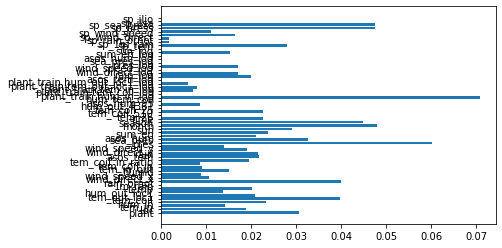

In [354]:
plt.barh(X_train2.columns, xgb3.feature_importances_)
plt.show()

In [355]:
xgb3.feature_importances_

array([0.03063402, 0.01879979, 0.01426033, 0.02343685, 0.03968458,
       0.02092186, 0.01384899, 0.02022108, 0.        , 0.03998694,
       0.01077291, 0.00891451, 0.01504208, 0.00901237, 0.00872629,
       0.01963475, 0.02178166, 0.02147128, 0.01901032, 0.01410644,
       0.06028588, 0.03269834, 0.0211153 , 0.02386939, 0.02913663,
       0.04805717, 0.04487077, 0.02266551, 0.        , 0.02274866,
       0.        , 0.0086388 , 0.        , 0.07083589, 0.        ,
       0.00707091, 0.00800676, 0.00589889, 0.        , 0.02004496,
       0.0170143 , 0.        , 0.01708694, 0.        , 0.        ,
       0.        , 0.01523254, 0.        , 0.02806311, 0.00178693,
       0.00172806, 0.01652808, 0.01117241, 0.04759943, 0.04757731,
       0.        , 0.        ], dtype=float32)

In [356]:
X_train2.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sun_log,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo
242710,2,2,11.07,64.47,13.19,5.88,96.18,5.5,0.001844,0.0,...,0.000000,5.7,0.0,0.0,238.7,2.2,1008.8,1011.5,0.0,0.0
179728,2,1,21.14,39.93,22.31,20.26,44.23,13.3,0.000000,0.0,...,0.000000,14.5,0.0,0.0,308.5,0.9,1015.2,1017.8,0.0,0.0
241362,2,2,14.73,70.09,9.68,15.95,70.63,14.3,0.000000,0.0,...,6.492240,17.5,0.0,0.0,208.7,6.0,1015.1,1017.7,0.0,0.0
292224,2,3,18.91,49.36,22.04,13.21,75.34,12.1,0.000000,0.0,...,0.000000,12.0,0.0,0.0,206.0,2.1,1008.8,1011.4,0.0,0.0
342464,2,3,8.05,38.00,8.15,12.84,26.86,4.9,0.000000,0.0,...,9.064158,3.6,0.0,0.0,204.1,3.0,1022.7,1025.2,0.0,0.0


### 예측

In [321]:
#ts_aws_11 = ts_aws_1.drop(['tem_coil_in','tem_in_out'], axis=1)
#ts_aws_11

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,wind_direct,wind_speed,humid,tem_coil_in_ratio
0,2,3,8.17,40.42,10.10,4.20,54.82,2.8,0.0,0.0,214.6,1.8,61.8,-0.236230
1,1,2,10.03,48.81,10.79,6.09,59.34,2.5,0.0,0.0,216.6,0.8,79.1,-0.075773
2,2,3,9.45,40.93,9.07,12.26,32.14,7.9,0.0,0.0,320.5,2.3,20.6,0.040212
3,1,1,12.32,34.13,10.86,12.32,28.27,8.3,0.0,0.0,322.3,3.5,21.4,0.118506
4,2,1,11.28,22.65,8.76,12.01,19.84,9.8,0.0,0.0,312.7,5.2,28.0,0.223404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1,2,10.73,33.36,13.30,6.28,46.37,1.5,0.0,0.0,218.8,2.1,69.5,-0.239515
3535,2,3,9.15,38.86,11.70,1.39,74.33,0.0,0.0,0.0,181.3,0.3,73.5,-0.278689
3536,2,1,7.10,44.87,9.03,4.26,58.06,-0.8,0.0,0.0,150.1,0.3,83.2,-0.271831
3537,1,1,13.54,33.49,12.20,12.90,33.67,11.6,0.0,0.0,83.0,2.0,39.9,0.098966


In [357]:
pred24 = xgb2.predict(ts_aws_1)
pred24

array([0., 0., 0., ..., 0., 0., 0.])

In [358]:
pred48 = xgb3.predict(ts_aws_1)
pred48

array([0., 0., 0., ..., 0., 0., 0.])

In [359]:
pred24_proba = xgb2.predict_proba(ts_aws_1)[:,1]
pred24_proba

array([1.1384393e-06, 1.7374456e-05, 2.2362170e-05, ..., 5.9313229e-06,
       6.5731248e-05, 2.4352384e-04], dtype=float32)

In [360]:
pred24_proba

array([1.1384393e-06, 1.7374456e-05, 2.2362170e-05, ..., 5.9313229e-06,
       6.5731248e-05, 2.4352384e-04], dtype=float32)

In [361]:
pred48_proba = xgb3.predict_proba(ts_aws_1)[:,1]
pred48_proba

array([3.5343946e-05, 9.4813737e-04, 6.3444575e-05, ..., 5.0563307e-05,
       4.4251308e-05, 7.9110214e-06], dtype=float32)

In [362]:
pred24_pr = pred24_proba*100
pred24_pr

array([0.00011384, 0.00173745, 0.00223622, ..., 0.00059313, 0.00657312,
       0.02435238], dtype=float32)

In [363]:
pred48_pr = pred48_proba*100
pred48_pr

array([0.00353439, 0.09481373, 0.00634446, ..., 0.00505633, 0.00442513,
       0.0007911 ], dtype=float32)

In [364]:
X24H_COND_LOC = pred24.tolist()
X48H_COND_LOC = pred48.tolist()
X24H_COND_LOC_PROB = pred24_pr.tolist()
X48H_COND_LOC_PROB = pred48_pr.tolist()

In [365]:
prob_24 = []
for i in X24H_COND_LOC_PROB:
    prob_24.append(round(i,2))

In [366]:
prob_48 = []
for i in X48H_COND_LOC_PROB:
    prob_48.append(round(i,2))

In [367]:
submission = pd.DataFrame({'X24H_COND_LOC': X24H_COND_LOC,
             'X48H_COND_LOC': X48H_COND_LOC,
             'X24H_COND_LOC_PROB': prob_24,
             'X48H_COND_LOC_PROB': prob_48})

In [368]:
submission

,X24H_COND_LOC,X48H_COND_LOC,X24H_COND_LOC_PROB,X48H_COND_LOC_PROB
0,0.0,0.0,0.00,0.00
1,0.0,0.0,0.00,0.09
2,0.0,0.0,0.00,0.01
3,0.0,0.0,0.00,0.00
4,0.0,0.0,0.00,0.00
...,...,...,...,...
3534,0.0,0.0,0.00,0.01
3535,0.0,0.0,0.00,0.00
3536,0.0,0.0,0.00,0.01
3537,0.0,0.0,0.01,0.00


In [75]:
#submission.to_csv('submission0613_2.csv', index=False)

In [369]:
pt_test.head()

,Unnamed: 0,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
0,1,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,3,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,4,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,5,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


In [370]:
val = pt_test.loc[:,['plant_test.mea_ddhr', 'plant_test.plant', 'plant_test.loc', 'plant_test.x24h_tma', 'plant_test.x24h_cond_loc', 'plant_test.x48h_tma', 'plant_test.x48h_cond_loc']]

In [371]:
val['plant_test.x24h_cond_loc'] = X24H_COND_LOC
val['plant_test.x48h_cond_loc'] = X48H_COND_LOC

In [372]:
val['X24H_COND_LOC_PROB'] = prob_24
val['X48H_COND_LOC_PROB'] = prob_48

In [373]:
val.columns = ['MEA_DDHR', 'PLANT', 'LOC', 'X24H_TMA', 'X24H_COND_LOC', 'X48H_TMA', 'X48H_COND_LOC', 'X24H_COND_LOC_PROB', 'X48H_COND_LOC_PROB']

In [374]:
order = ['MEA_DDHR', 'PLANT', 'LOC', 'X24H_TMA', 'X24H_COND_LOC', 'X24H_COND_LOC_PROB', 'X48H_TMA', 'X48H_COND_LOC', 'X48H_COND_LOC_PROB']

In [375]:
val1 = val[order]
val1

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 0:00,2,3,2019-04-02 0:00,0.0,0.00,2019-04-03 0:00,0.0,0.00
1,2019-04-01 4:30,1,2,2019-04-02 4:30,0.0,0.00,2019-04-03 4:30,0.0,0.09
2,2019-04-01 10:30,2,3,2019-04-02 10:30,0.0,0.00,2019-04-03 10:30,0.0,0.01
3,2019-04-01 11:00,1,1,2019-04-02 11:00,0.0,0.00,2019-04-03 11:00,0.0,0.00
4,2019-04-01 13:30,2,1,2019-04-02 13:30,0.0,0.00,2019-04-03 13:30,0.0,0.00
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,2020-03-30 3:00,0.0,0.00,2020-03-31 3:00,0.0,0.01
3535,2020-03-29 5:00,2,3,2020-03-30 5:00,0.0,0.00,2020-03-31 5:00,0.0,0.00
3536,2020-03-29 7:00,2,1,2020-03-30 7:00,0.0,0.00,2020-03-31 7:00,0.0,0.01
3537,2020-03-29 11:30,1,1,2020-03-30 11:30,0.0,0.01,2020-03-31 11:30,0.0,0.00


In [376]:
val1.isnull().sum()

MEA_DDHR              0
PLANT                 0
LOC                   0
X24H_TMA              0
X24H_COND_LOC         0
X24H_COND_LOC_PROB    0
X48H_TMA              0
X48H_COND_LOC         0
X48H_COND_LOC_PROB    0
dtype: int64

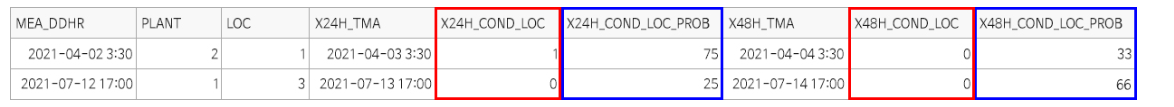

In [377]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MEA_DDHR            3539 non-null   object 
 1   PLANT               3539 non-null   int64  
 2   LOC                 3539 non-null   int64  
 3   X24H_TMA            3539 non-null   object 
 4   X24H_COND_LOC       3539 non-null   float64
 5   X24H_COND_LOC_PROB  3539 non-null   float64
 6   X48H_TMA            3539 non-null   object 
 7   X48H_COND_LOC       3539 non-null   float64
 8   X48H_COND_LOC_PROB  3539 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 249.0+ KB


In [378]:
val1['X24H_COND_LOC'] = val1['X24H_COND_LOC'].astype('int64')
val1['X48H_COND_LOC'] = val1['X48H_COND_LOC'].astype('int64')

In [379]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MEA_DDHR            3539 non-null   object 
 1   PLANT               3539 non-null   int64  
 2   LOC                 3539 non-null   int64  
 3   X24H_TMA            3539 non-null   object 
 4   X24H_COND_LOC       3539 non-null   int64  
 5   X24H_COND_LOC_PROB  3539 non-null   float64
 6   X48H_TMA            3539 non-null   object 
 7   X48H_COND_LOC       3539 non-null   int64  
 8   X48H_COND_LOC_PROB  3539 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 249.0+ KB


In [188]:
val1.to_csv('203675_0618_1.csv', index=False)